# Task 01

In [1]:
import numpy as np

In [2]:
arr_1d = np.array([1, 2, 3, 4, 5])
arr_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

def basic_ops_numpy_arrays():
  global arr_1d
  global arr_2d
  arr_1d = np.array([1, 3, 6, 0, 4])
  arr_2d = np.array([[1, 3, 4], [9, 7, 6], [9, 11, 13]])
  print("1D Array:", arr_1d)
  print("2D Array:\n", arr_2d)
  print("Sum of 1D Array:", np.sum(arr_1d))
  print("Mean of 2D Array:", np.mean(arr_2d))
  print("Transpose of 2D Array:\n", arr_2d.T)

basic_ops_numpy_arrays()

1D Array: [1 3 6 0 4]
2D Array:
 [[ 1  3  4]
 [ 9  7  6]
 [ 9 11 13]]
Sum of 1D Array: 14
Mean of 2D Array: 7.0
Transpose of 2D Array:
 [[ 1  9  9]
 [ 3  7 11]
 [ 4  6 13]]


# Task 02


In [3]:
def greyscale_image():
  # Creating a grayscale image using a 2D NumPy array
  image = np.random.randint(0, 256, (5, 5), dtype=np.uint8)
  print("Original Image:\n", image)
  # Slicing a portion of the image
  cropped = image[1:4, 1:4]
  print("Cropped Section:\n", cropped)
  # Inverting colors
  inverted_image = 255 - image
  print("Inverted Image:\n", inverted_image)
greyscale_image()

Original Image:
 [[167 254  19 134 122]
 [126  79 172  49 186]
 [  7  10 111 156 255]
 [148  91  55 132 103]
 [ 78  95 173  93  14]]
Cropped Section:
 [[ 79 172  49]
 [ 10 111 156]
 [ 91  55 132]]
Inverted Image:
 [[ 88   1 236 121 133]
 [129 176  83 206  69]
 [248 245 144  99   0]
 [107 164 200 123 152]
 [177 160  82 162 241]]


# Task 03

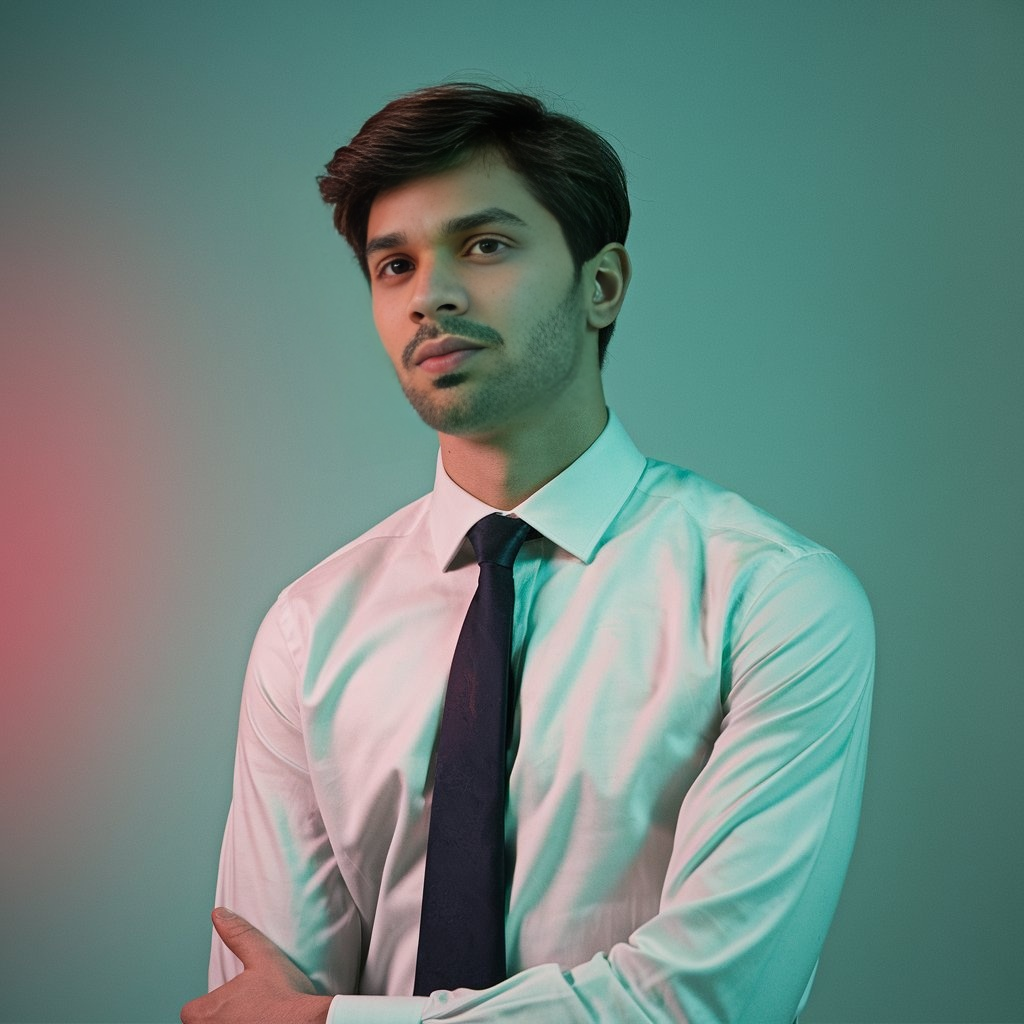

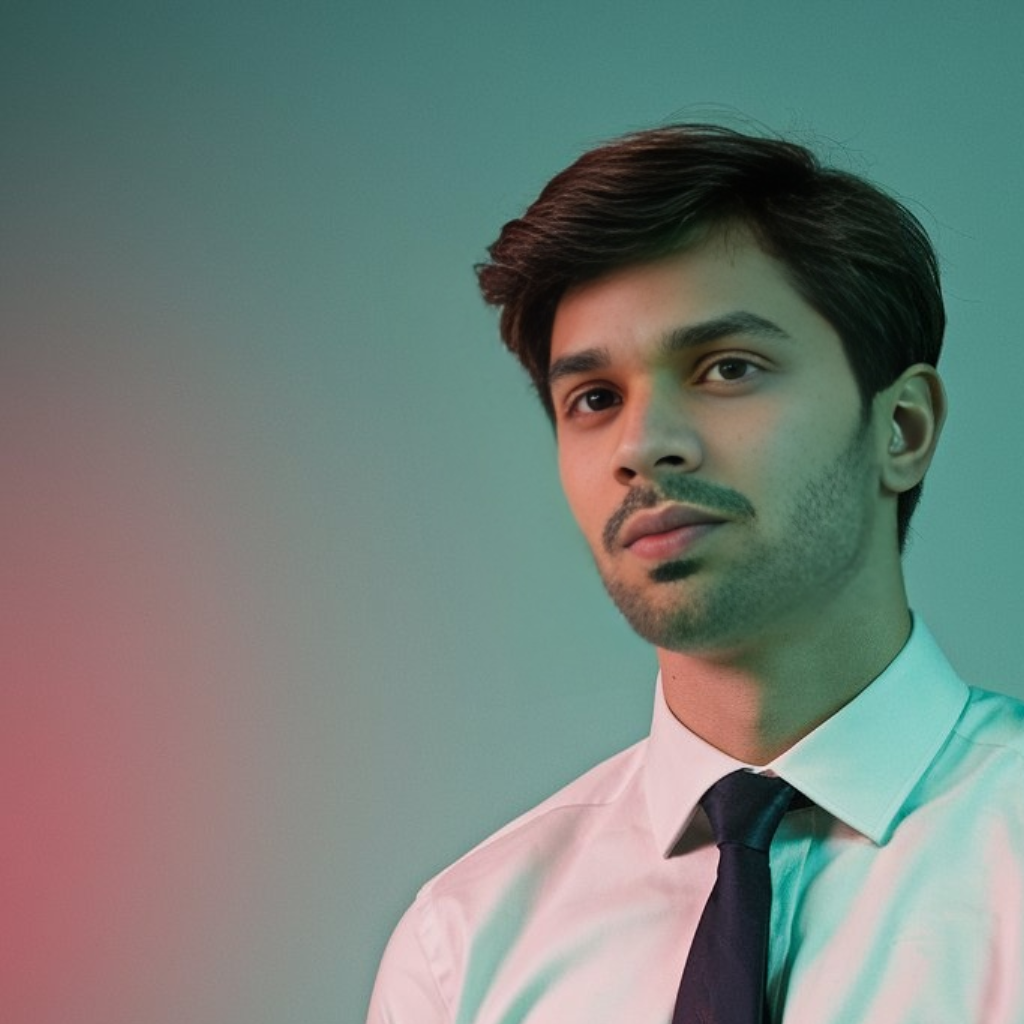

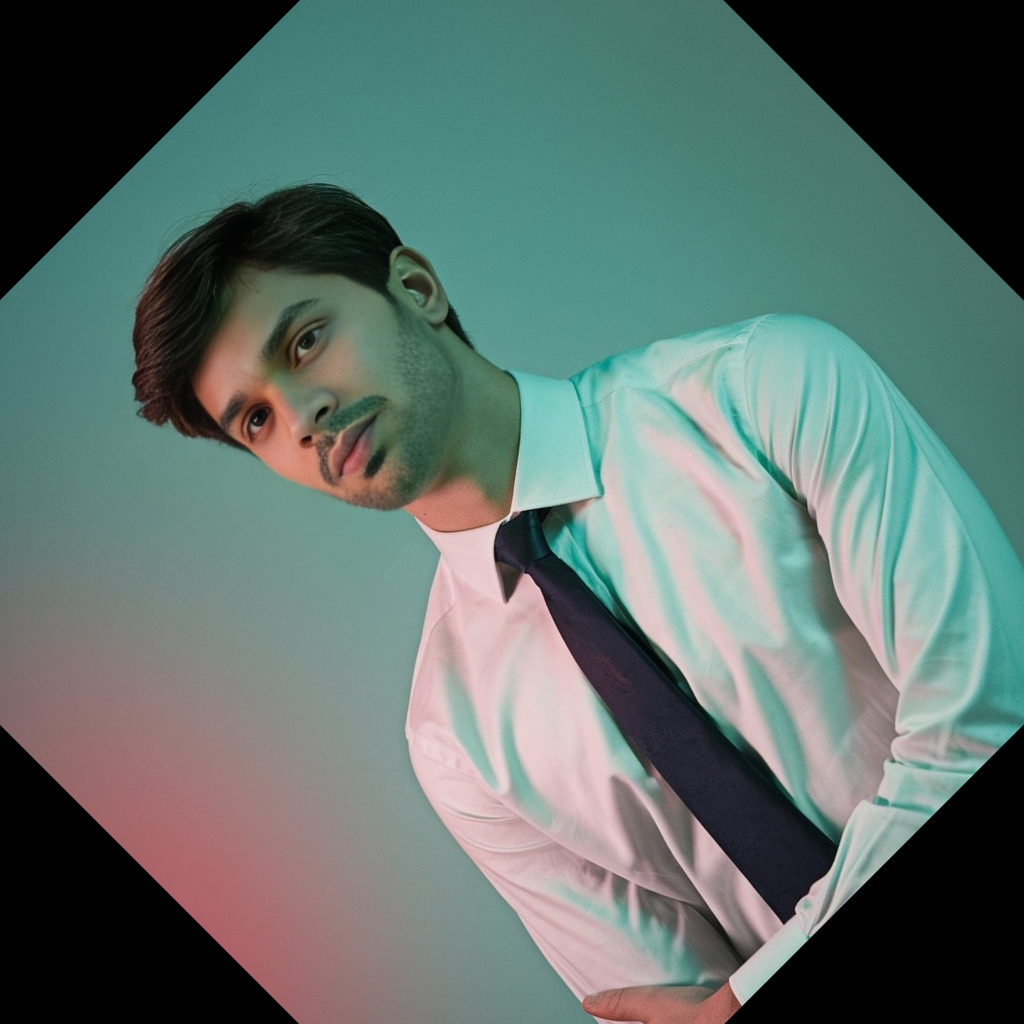

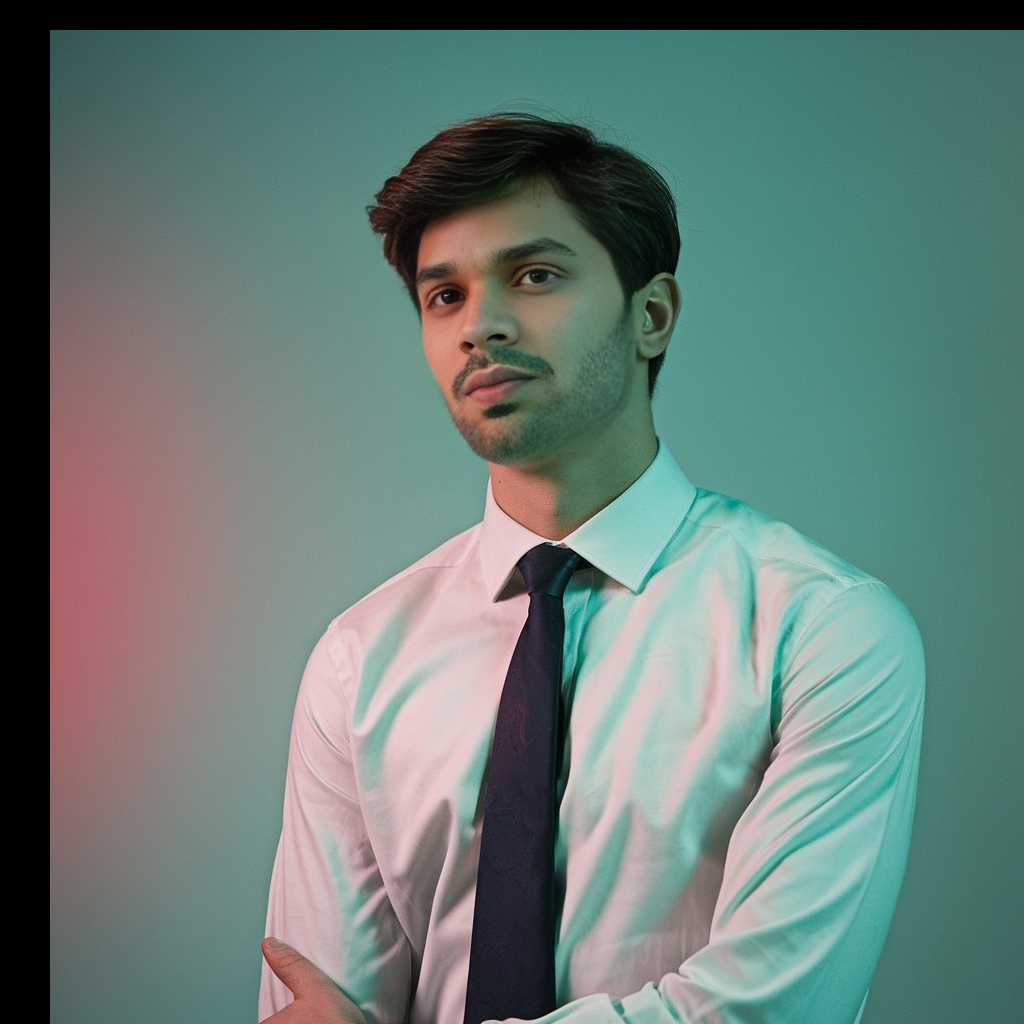

In [5]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Load an image
image = cv2.imread('Zain_Profile.jpg')  # Use your own image

def scale_image(image, scale_factor):
    # Create the scaling matrix
    scaling_matrix = np.array([
        [scale_factor, 0, 0],
        [0, scale_factor, 0],
        [0, 0, 1]
    ])

    # Get the image dimensions
    rows, cols = image.shape[:2]

    # Apply the transformation
    scaled_image = cv2.warpPerspective(image, scaling_matrix, (cols, rows))
    return scaled_image

# Rotation Transformation
def rotate_image(image, angle):
    # Get the image dimensions
    rows, cols = image.shape[:2]

    # Get the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)

    # Apply the rotation
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image

# Translation Transformation
def translate_image(image, tx, ty):
    # Create the translation matrix
    translation_matrix = np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ], dtype=np.float32)

    # Get the image dimensions
    rows, cols = image.shape[:2]

    # Apply the transformation
    translated_image = cv2.warpPerspective(image, translation_matrix, (cols, rows))
    return translated_image

# Example transformations
scaled_image = scale_image(image, 1.5)  # Scale by a factor of 1.5
rotated_image = rotate_image(image, 45)  # Rotate by 45 degrees
translated_image = translate_image(image, 50, 30)  # Translate by 50 pixels along x and 30 pixels along y

# Show the results
cv2_imshow(image)
cv2_imshow(scaled_image)
cv2_imshow(rotated_image)
cv2_imshow(translated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Task 04

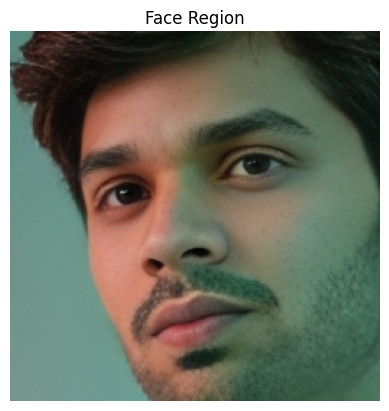

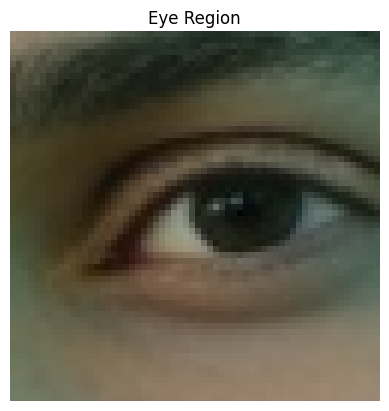

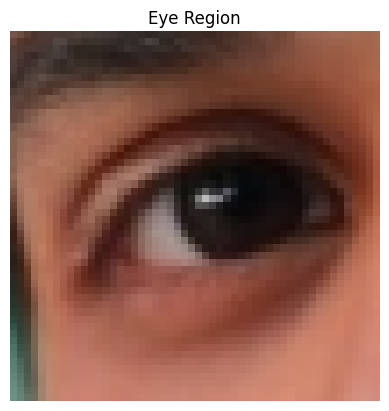

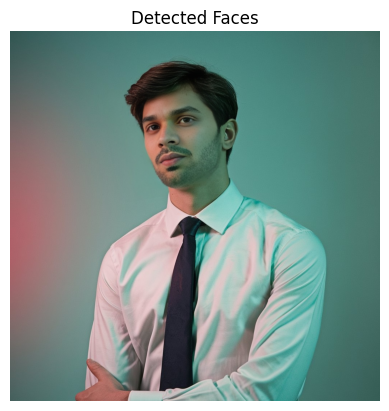

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image and convert it to a NumPy array
image_path = 'Zain_Profile.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Check if image is loaded properly
if image is None:
    raise ValueError("Image not found. Please check the path.")

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load OpenCV's pre-trained Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +
                                     'haarcascade_frontalface_default.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(image_gray, scaleFactor=1.1, minNeighbors=5)

# Loop through the detected faces and extract facial features (regions)
for (x, y, w, h) in faces:
    # Slice the image array to extract the face region
    face_region = image[y:y+h, x:x+w]

    # Display the face region using matplotlib (Colab-friendly)
    plt.figure()
    plt.imshow(cv2.cvtColor(face_region, cv2.COLOR_BGR2RGB))
    plt.title('Face Region')
    plt.axis('off')
    plt.show()

    # Extract additional facial features if required (e.g., eyes, nose)
    eyes_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +
                                         'haarcascade_eye.xml')
    eyes = eyes_cascade.detectMultiScale(face_region, scaleFactor=1.1, minNeighbors=5)

    for (ex, ey, ew, eh) in eyes:
        eye_region = face_region[ey:ey+eh, ex:ex+ew]

        # Display the eye region using matplotlib (Colab-friendly)
        plt.figure()
        plt.imshow(cv2.cvtColor(eye_region, cv2.COLOR_BGR2RGB))
        plt.title('Eye Region')
        plt.axis('off')
        plt.show()

# Display the original image with detected faces using matplotlib
plt.figure()
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Detected Faces')
plt.axis('off')
plt.show()
